In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
df=pd.read_excel("C:\\Users\\rcmlp.12\\Desktop\\R & D\\all_fleet_prediction.xlsx")

In [4]:
df

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62720,699,80,8011,1323193,JFK,ENGINE START VALVE,ENGINE START VALVE,MESSAGE,OPS CHECK GOOD,202110,0.61538,0,0,0,1,0,0,1.00,low,0
62721,1159,80,8011,1323074,CVG,ENGINE STARTER,ENGINE STARTER,FOD,RAR,202110,0.29940,0,0,0,0,1,0,0.75,low,0
62722,1032,80,8011,1490016,SZX,ENGINE STARTER,ENGINE STARTER,MESSAGE,RAR,202106,10.92466,1,0,1,1,0,0,4.75,low,0
62723,635,80,8011,1322929,CVG,ENGINE STARTER CHIP DETECTOR,ENGINE STARTER,INOP,RAR,202108,0.29940,0,0,0,0,1,0,0.75,low,0


In [5]:
df.corr()

,ID,CHAPTER,SUB_SYSTEM,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,OUTPUT
ID,1.000000,0.014015,0.014337,0.048221,-0.087799,-0.005956,-0.019789,-0.002908,0.039100,-0.034069,-0.008197,0.001513,-0.008132
CHAPTER,0.014015,1.000000,0.999895,0.010055,0.007455,0.033777,0.000339,0.034116,-0.036890,0.034744,0.033561,0.026455,0.031553
SUB_SYSTEM,0.014337,0.999895,1.000000,0.010934,0.007648,0.034061,0.000446,0.034386,-0.035185,0.033311,0.033626,0.027071,0.031625
REPORT_DATE,0.048221,0.010055,0.010934,1.000000,0.005410,-0.000902,0.014420,-0.003184,0.027013,-0.027907,-0.009467,0.001471,-0.005628
RNK,-0.087799,0.007455,0.007648,0.005410,1.000000,0.417234,0.021414,0.418703,0.092942,-0.079187,0.551611,0.417168,0.504495
INT,-0.005956,0.033777,0.034061,-0.000902,0.417234,1.000000,0.151111,0.987802,0.068577,-0.060473,0.481913,0.939804,0.540173
CNX,-0.019789,0.000339,0.000446,0.014420,0.021414,0.151111,1.000000,-0.004662,0.007805,-0.005960,0.009660,0.149163,0.149104
DLY,-0.002908,0.034116,0.034386,-0.003184,0.418703,0.987802,-0.004662,1.000000,0.068143,-0.060235,0.485984,0.927214,0.522954
PIREP,0.039100,-0.036890,-0.035185,0.027013,0.092942,0.068577,0.007805,0.068143,1.000000,-0.880850,0.113796,0.249760,0.109359
MAREPS,-0.034069,0.034744,0.033311,-0.027907,-0.079187,-0.060473,-0.005960,-0.060235,-0.880850,1.000000,-0.098284,-0.085063,-0.070867


<AxesSubplot:>

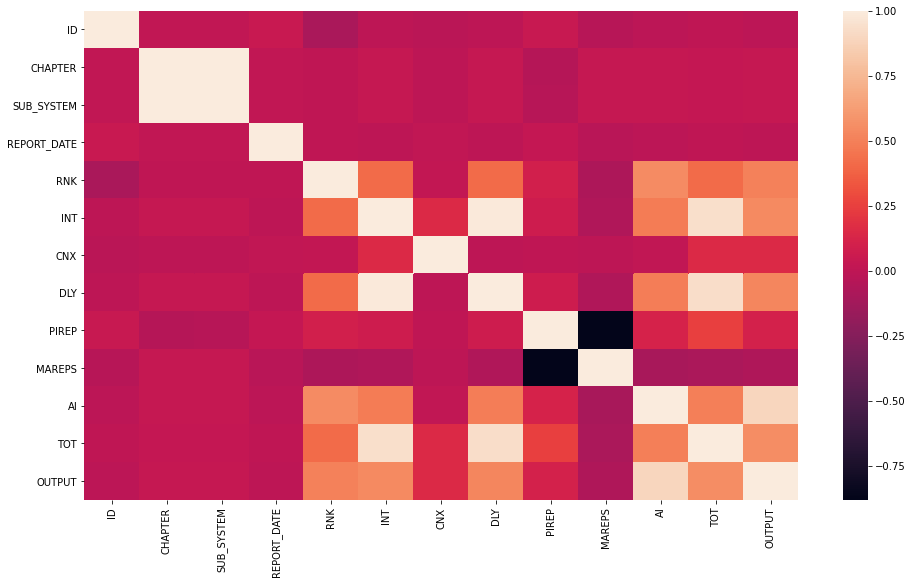

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr())

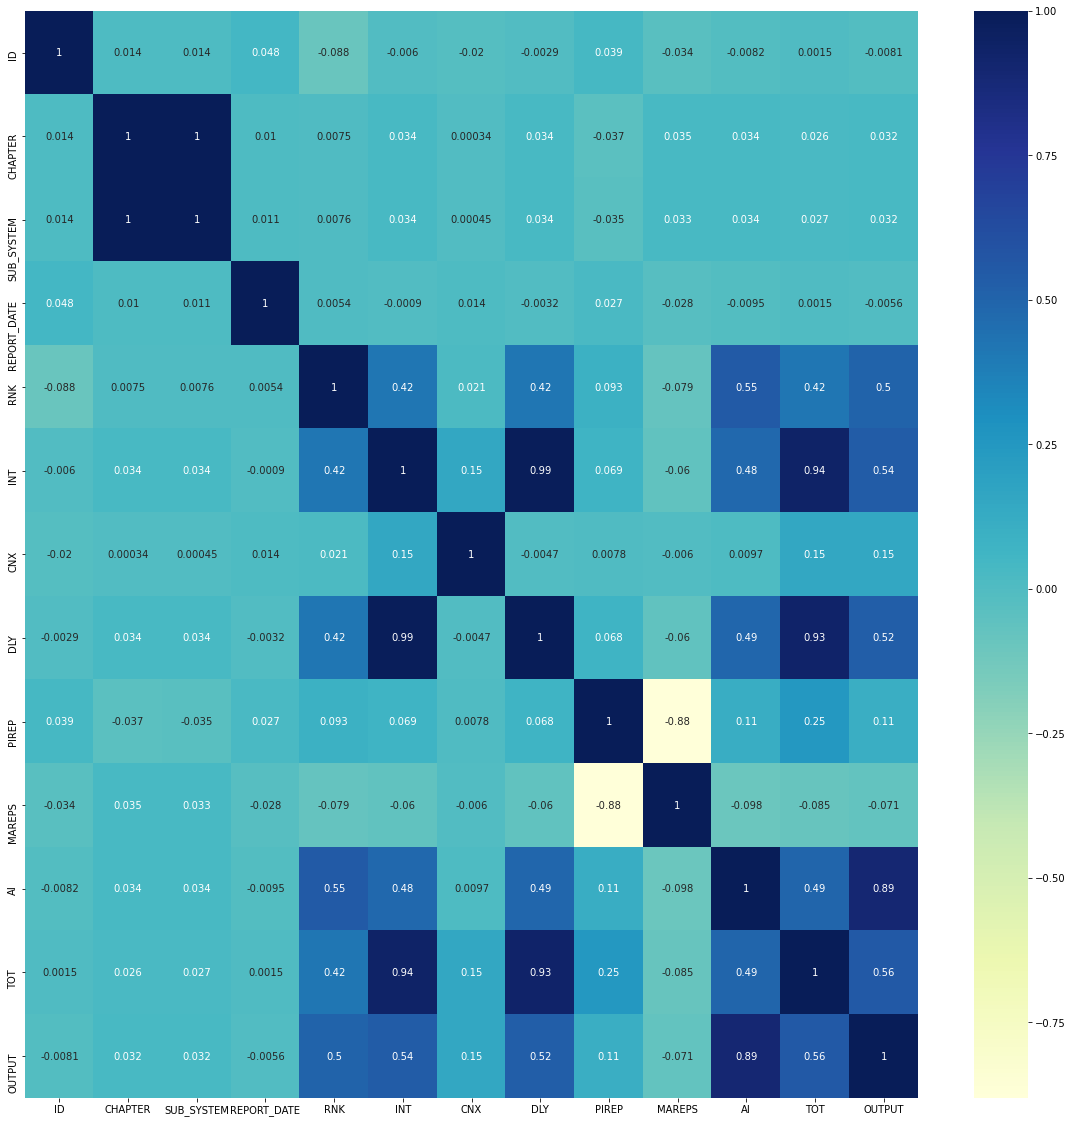

In [183]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<Figure size 1152x648 with 0 Axes>

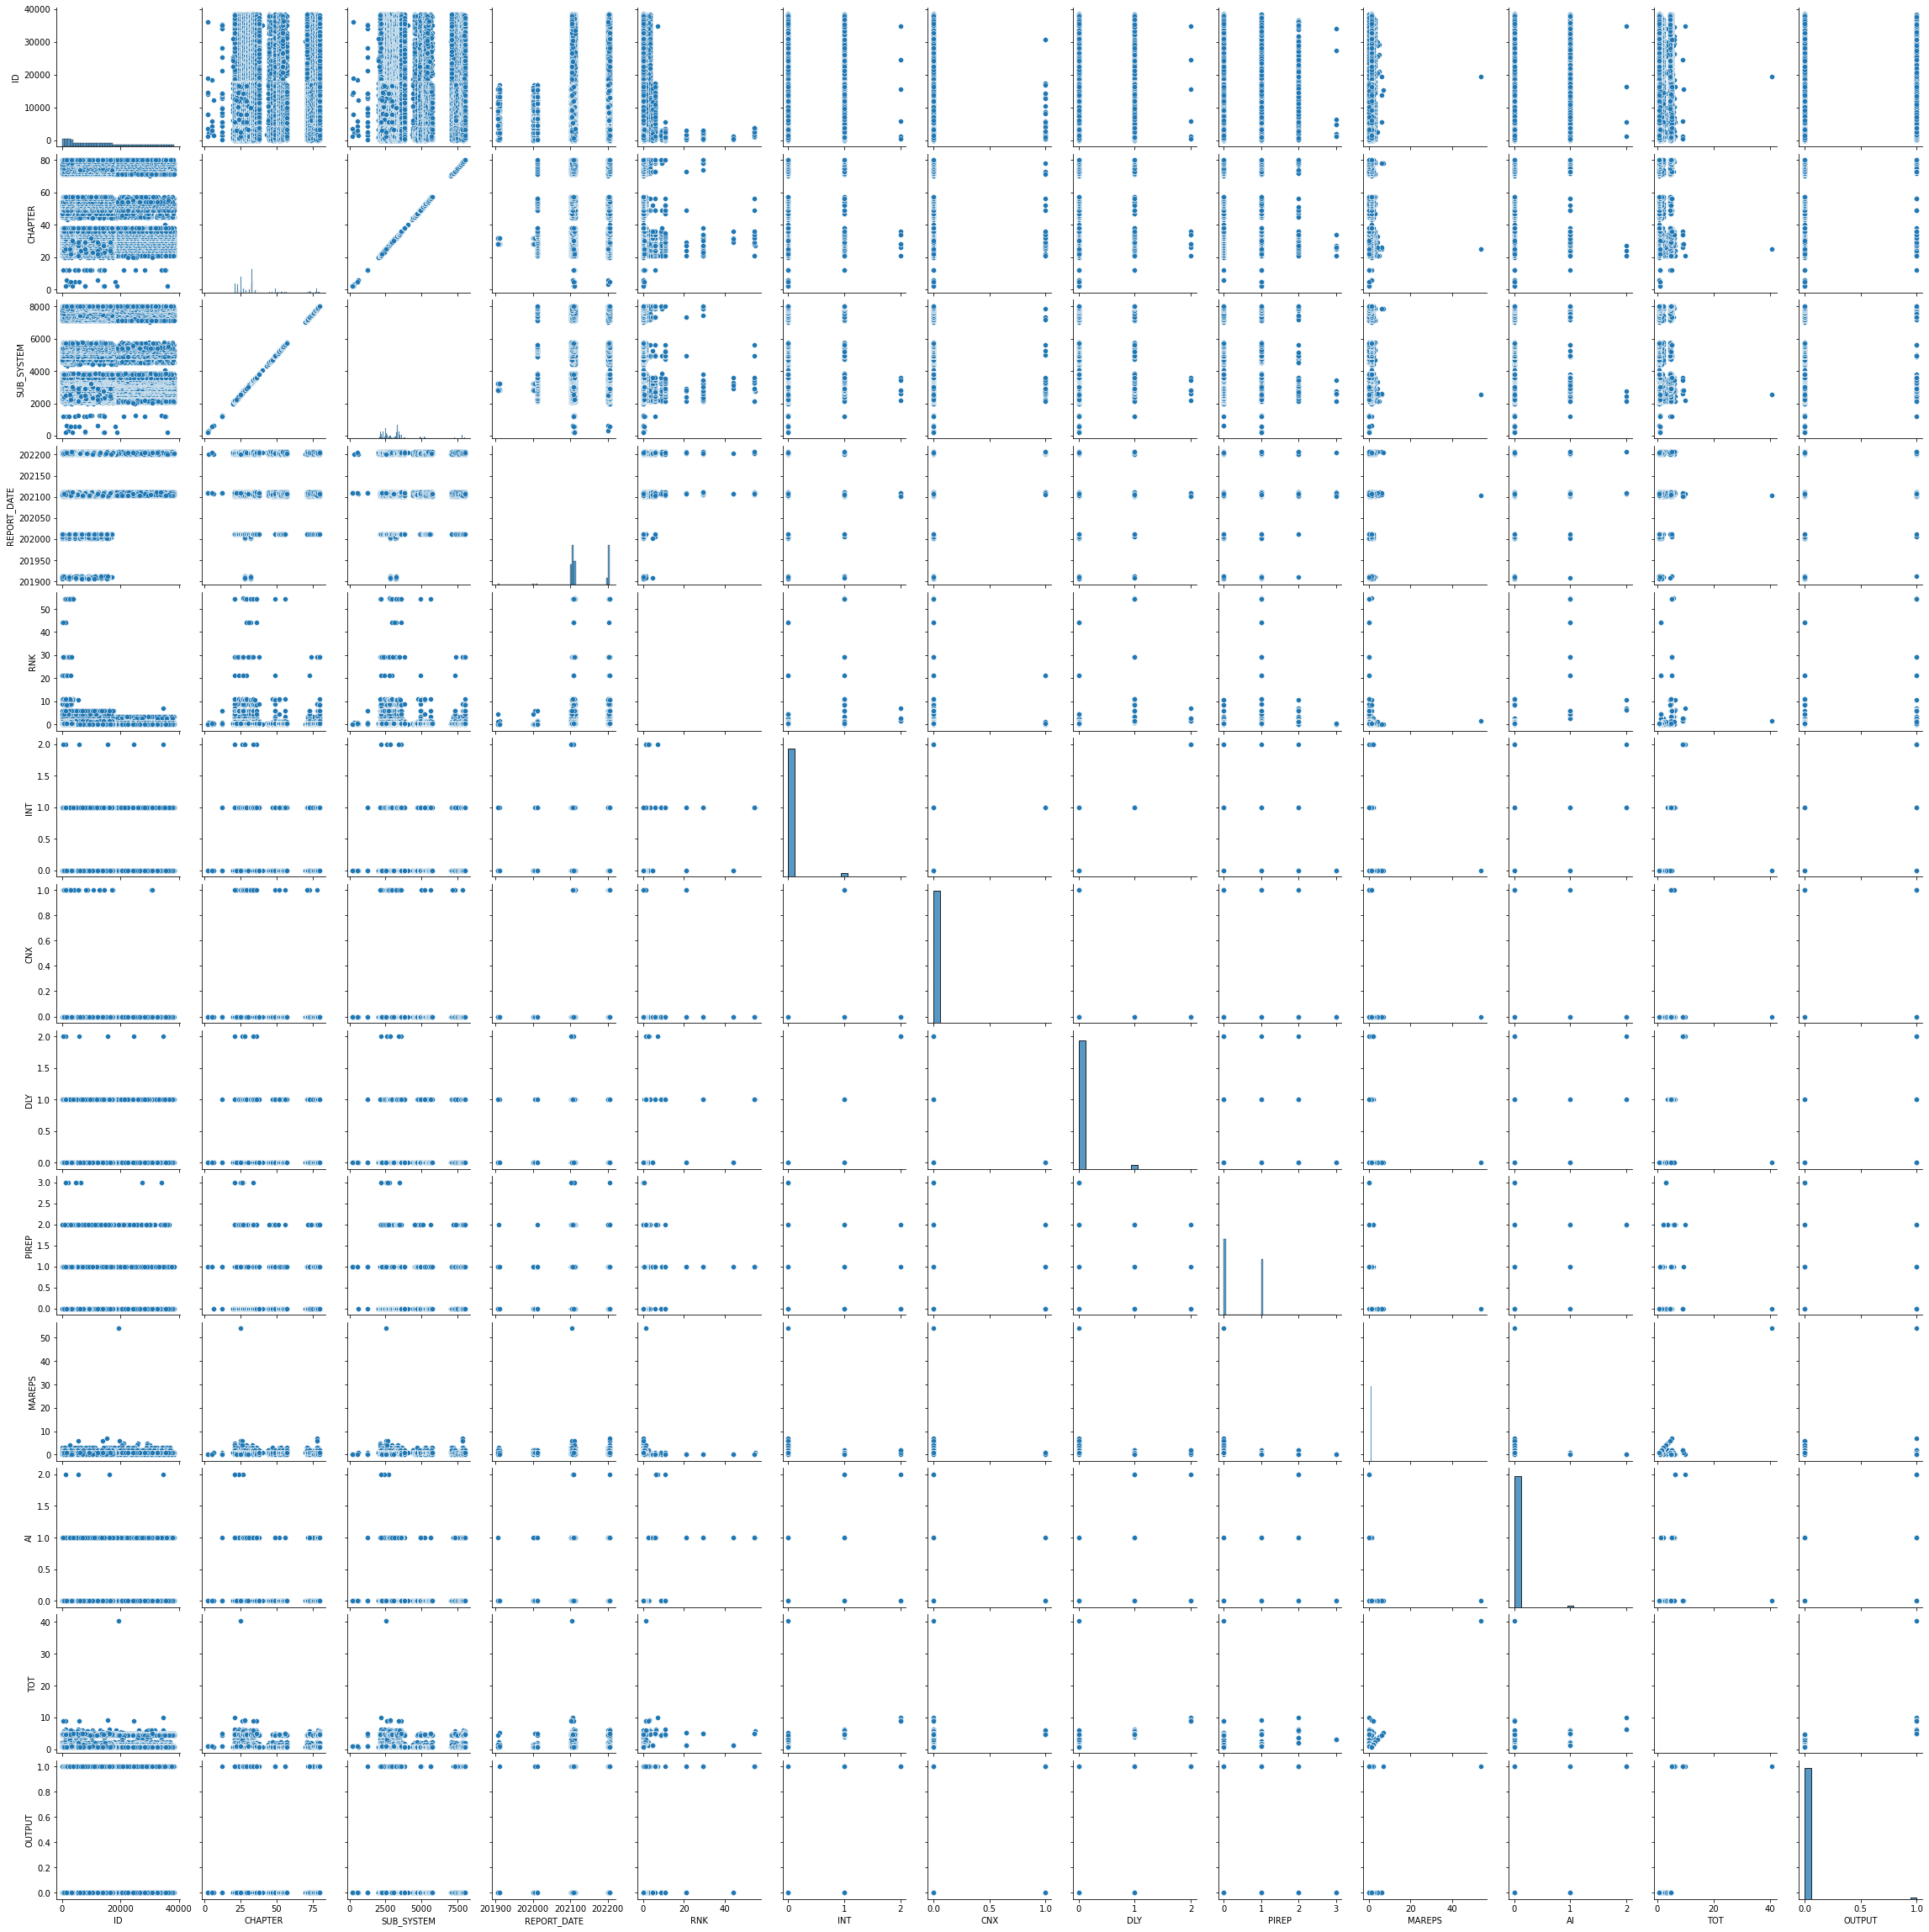

In [7]:
plt.figure(figsize=(16,9))
sns.pairplot(df)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT', ylabel='count'>

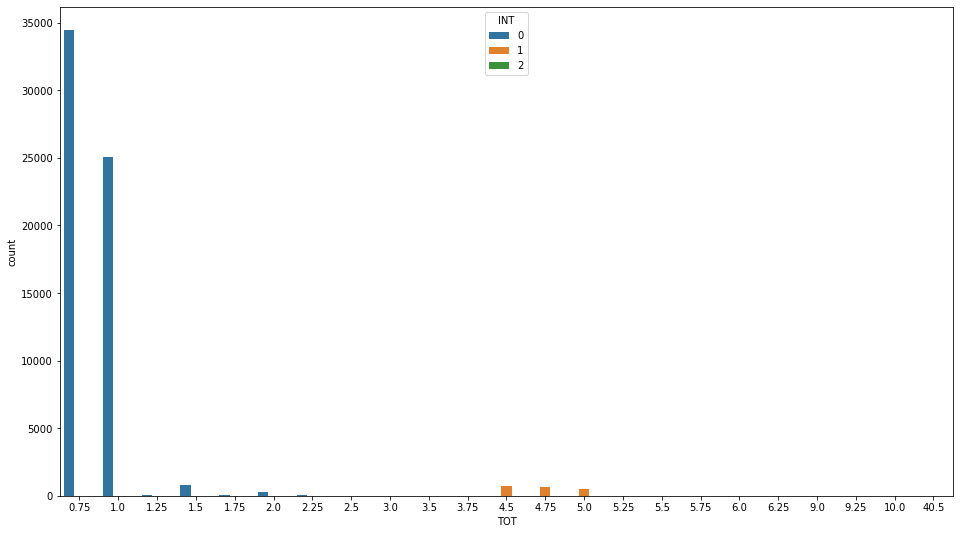

In [8]:
plt.figure(figsize=(16,9))
sns.countplot("TOT",hue="INT",data=df)

<AxesSubplot:xlabel='CHAPTER', ylabel='count'>

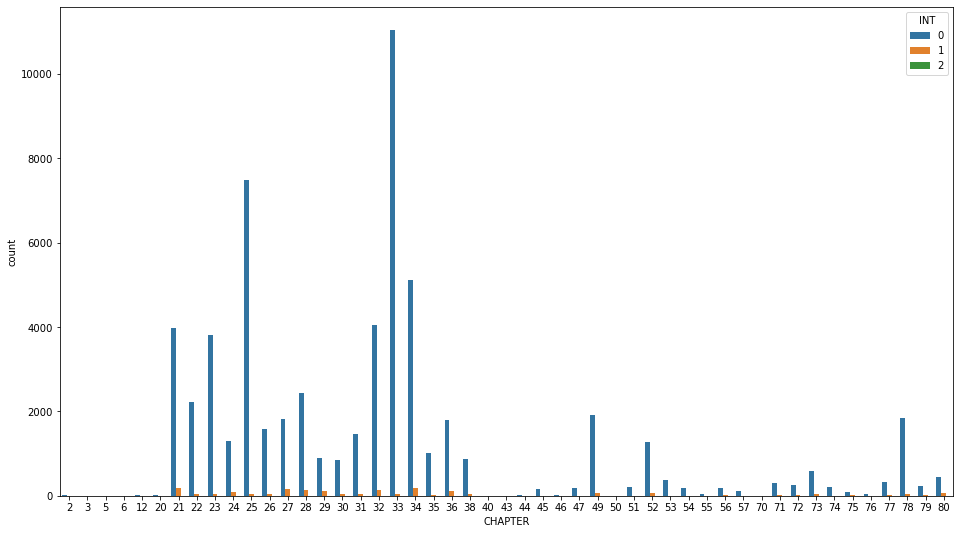

In [9]:
plt.figure(figsize=(16,9))
sns.countplot(x="CHAPTER",hue="INT",data=df)

<AxesSubplot:xlabel='CHAPTER', ylabel='count'>

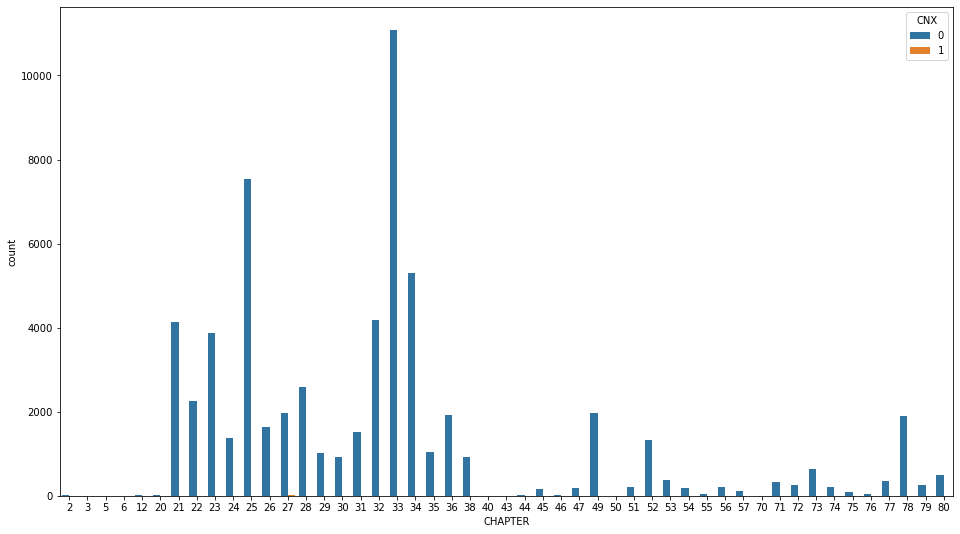

In [10]:
plt.figure(figsize=(16,9))
sns.countplot(x="CHAPTER",hue="CNX",data=df)

<AxesSubplot:xlabel='CHAPTER', ylabel='count'>

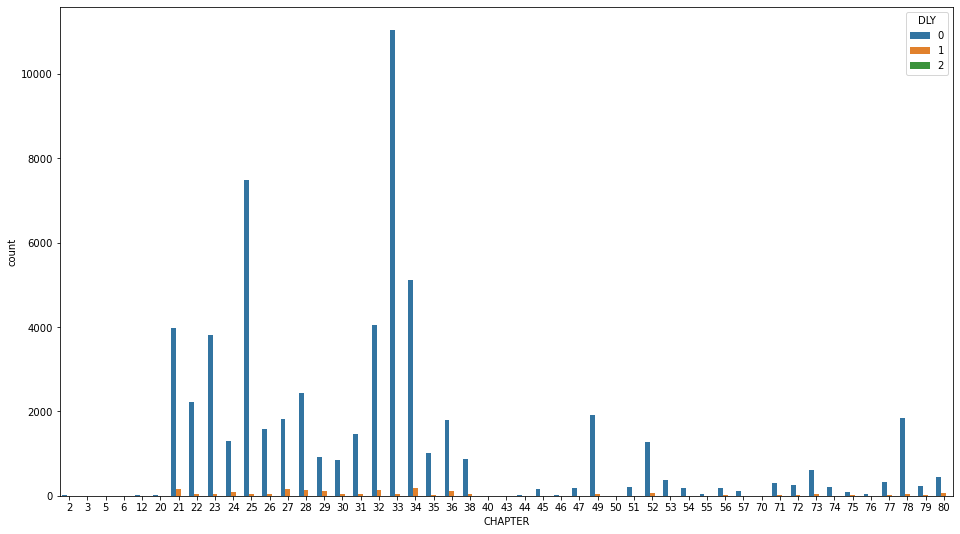

In [11]:
plt.figure(figsize=(16,9))
sns.countplot(x="CHAPTER",hue="DLY",data=df)

<AxesSubplot:xlabel='CHAPTER', ylabel='count'>

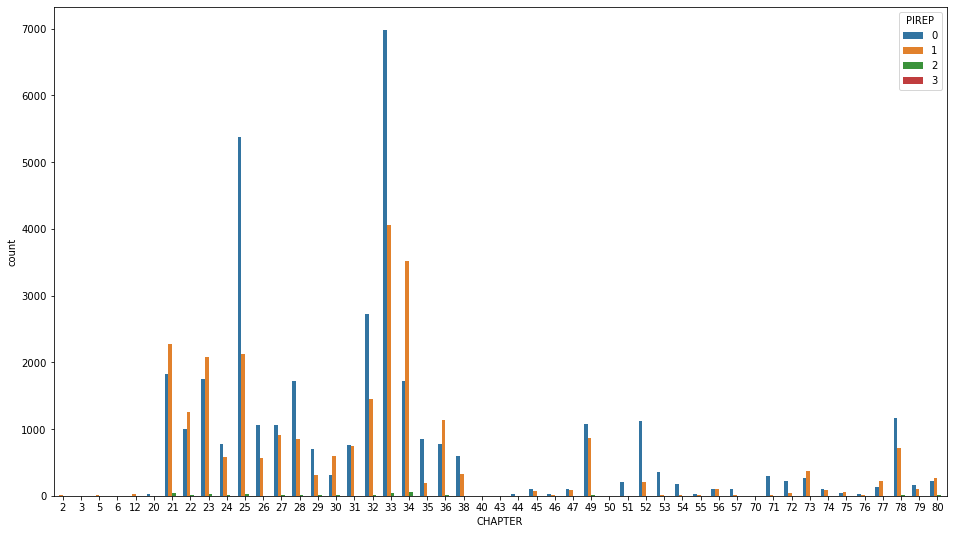

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(x="CHAPTER",hue="PIREP",data=df)

<AxesSubplot:xlabel='CHAPTER', ylabel='count'>

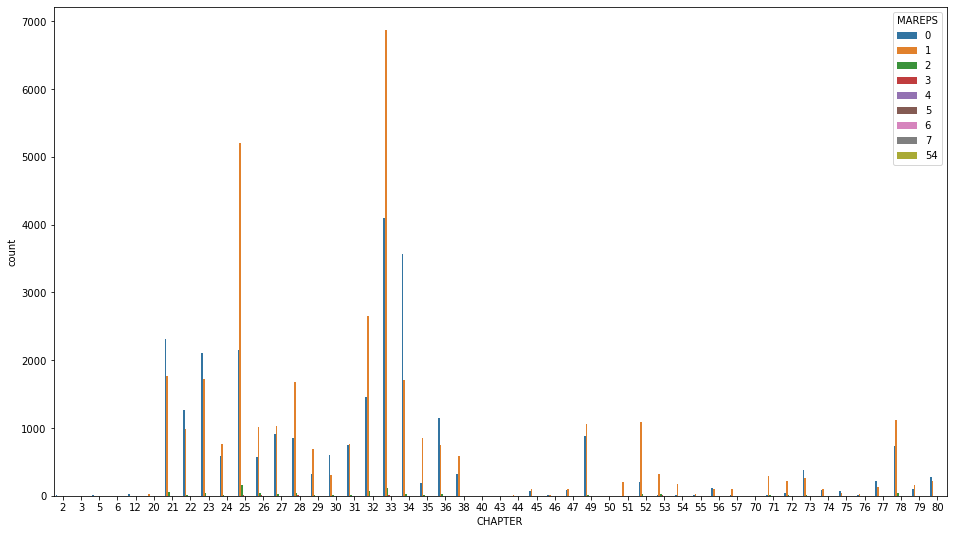

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(x="CHAPTER",hue="MAREPS",data=df)

<AxesSubplot:xlabel='PIREP', ylabel='count'>

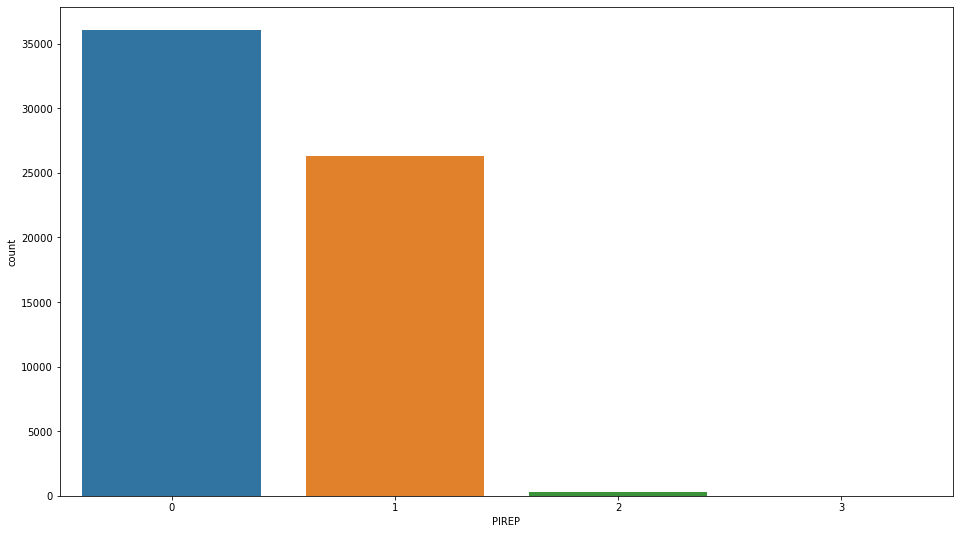

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x="PIREP",data=df)

<AxesSubplot:xlabel='MAREPS', ylabel='count'>

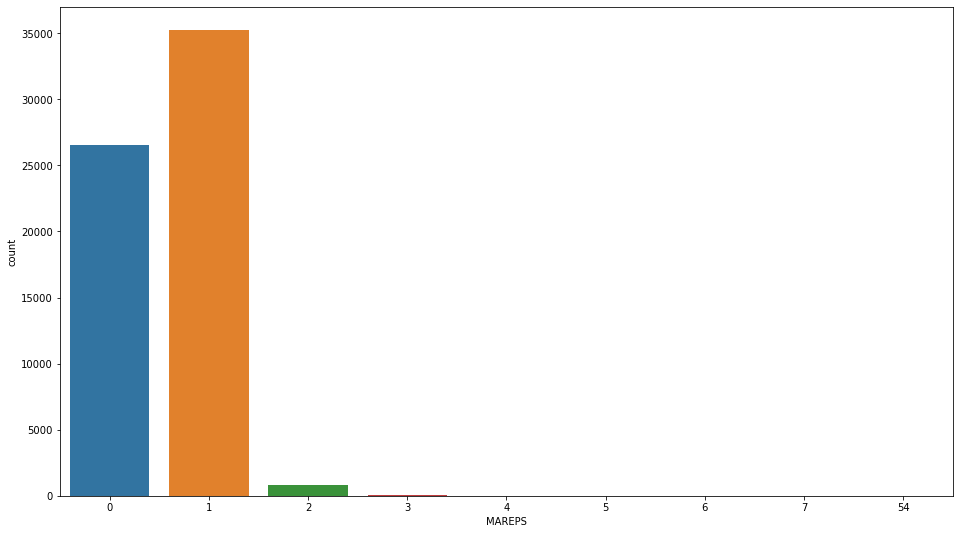

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x="MAREPS",data=df)

<AxesSubplot:xlabel='PIREP', ylabel='INT'>

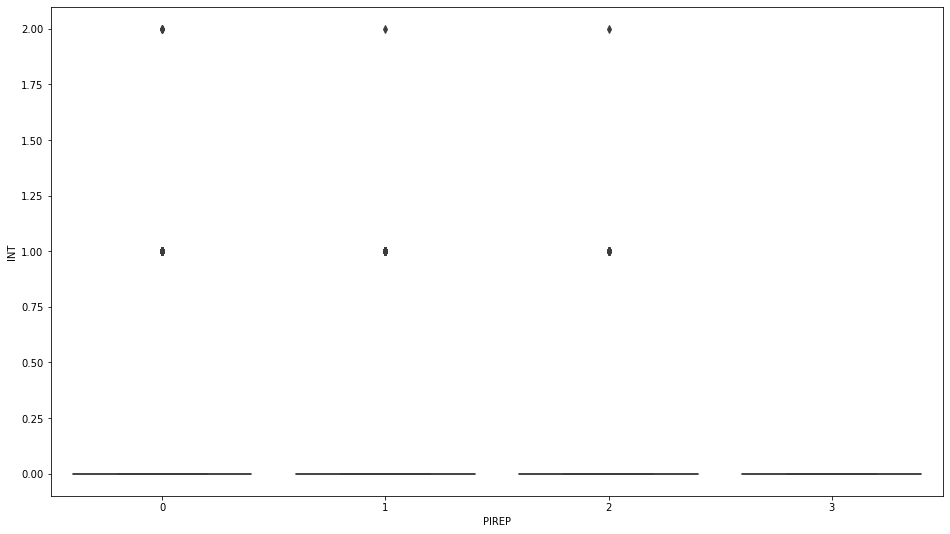

In [16]:
plt.figure(figsize=(16,9))
sns.boxplot(x="PIREP",y="INT",data=df)

<AxesSubplot:xlabel='MAREPS', ylabel='INT'>

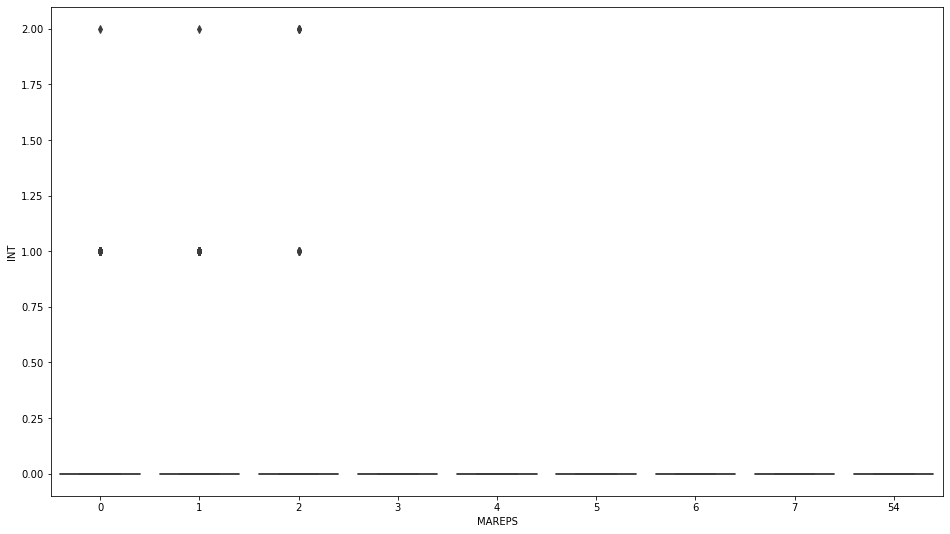

In [17]:
plt.figure(figsize=(16,9))
sns.boxplot(x="MAREPS",y="INT",data=df)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHAPTER', ylabel='INT'>

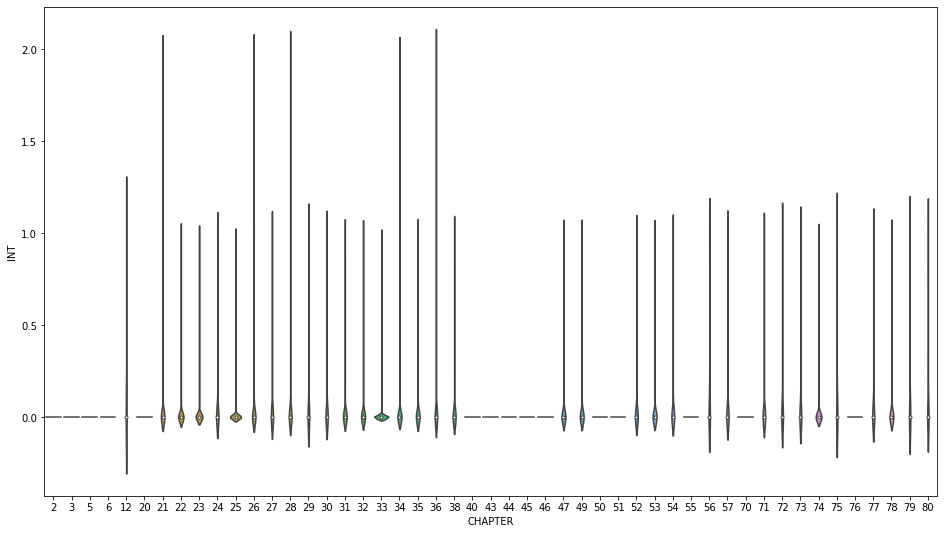

In [18]:
plt.figure(figsize=(16,9))
sns.violinplot("CHAPTER","INT",data=df)

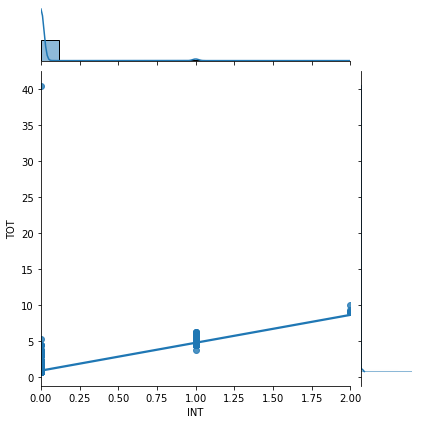

In [19]:
sns.jointplot(x="INT",y="TOT",data=df,kind="reg")

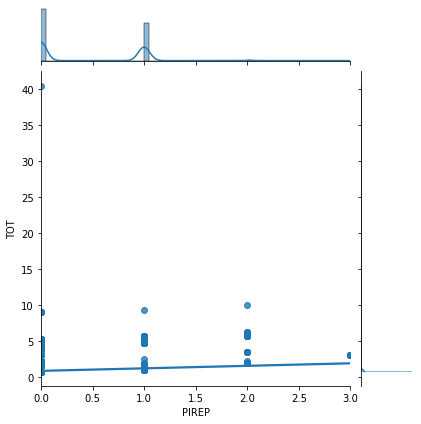

In [20]:
sns.jointplot(x="PIREP",y="TOT",data=df,kind="reg")

# LOGISTIC REGRESSION

In [21]:
X=df.iloc[:,11:-3]
y=df.iloc[:,-1]

In [22]:
X

,INT,CNX,DLY,PIREP,MAREPS,AI
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
62720,0,0,0,1,0,0
62721,0,0,0,0,1,0
62722,1,0,1,1,0,0
62723,0,0,0,0,1,0


In [23]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62720    0
62721    0
62722    0
62723    0
62724    0
Name: OUTPUT, Length: 62725, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train

,INT,CNX,DLY,PIREP,MAREPS,AI
15813,0,0,0,1,0,0
58979,0,0,0,0,1,0
36780,0,0,0,0,1,0
54919,0,0,0,1,0,0
8134,0,0,0,1,0,0
...,...,...,...,...,...,...
62570,0,0,0,0,1,0
38158,0,0,0,0,1,0
860,0,0,0,0,1,0
15795,0,0,0,1,0,0


In [27]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [30]:
model=LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_predict_df=pd.DataFrame(y_predict)

In [34]:
y_predict_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
20695,0
20696,0
20697,0
20698,0


In [35]:
y_predict_df. to_excel("Y_predict.xls")

<ipython-input-35-ddb3e9b534ed>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  y_predict_df. to_excel("Y_predict.xls")


In [36]:
confusion_matrix(y_test, y_predict)


array([[20527,     1],
       [   13,   159]], dtype=int64)

<AxesSubplot:>

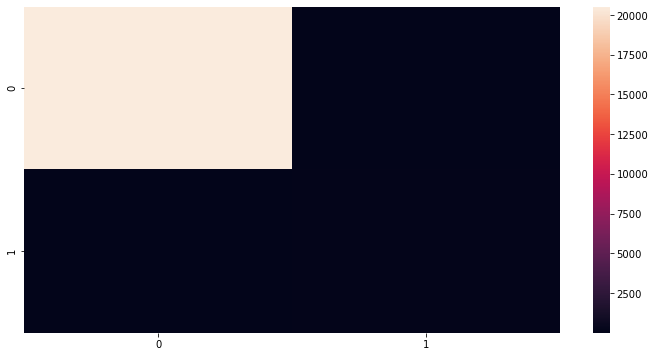

In [37]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test, y_predict))

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support

In [39]:
y_prob = clf.predict_proba(X)

In [40]:
y_prob

array([[9.99974930e-01, 2.50695079e-05],
       [9.99995303e-01, 4.69696225e-06],
       [9.99974930e-01, 2.50695079e-05],
       ...,
       [9.70607050e-01, 2.93929503e-02],
       [9.99995303e-01, 4.69696225e-06],
       [9.99995303e-01, 4.69696225e-06]])

Accuracy = (True Positive + True Negative) / (True Positive + False Positive + True Negative + False Negative).

Precision = TP / (TP + FP).

Recall = TP / (TP + FN).

In [41]:
c_matrix = confusion_matrix(y_test, y_predict)
print(c_matrix)



[[20527     1]
 [   13   159]]


In [42]:
print(metrics.accuracy_score(y_test, y_predict))
print(metrics.precision_score(y_test, y_predict))
print(metrics.recall_score(y_test, y_predict))



<IPython.core.display.Javascript object>

0.9993236714975845


<IPython.core.display.Javascript object>

0.99375


<IPython.core.display.Javascript object>

0.9244186046511628


In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

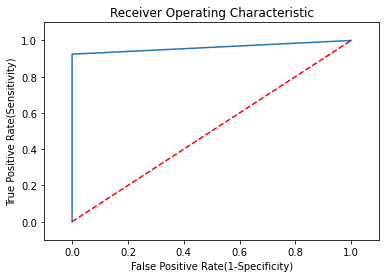

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

In [45]:
c_matrix = confusion_matrix(y_test, y_predict)
TPS = c_matrix[0][0]
FPS = c_matrix[0][1]
FNS = c_matrix[1][0]
TNS = c_matrix[1][1]
print(c_matrix)
print ('TP is :', TPS) 
print('FP is :', FPS) 
print('FN is :', FNS)
print('TN is :', TNS)

[[20527     1]
 [   13   159]]
TP is : 20527
FP is : 1
FN is : 13
TN is : 159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

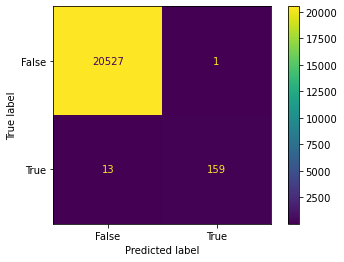

In [46]:
c_matrix = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

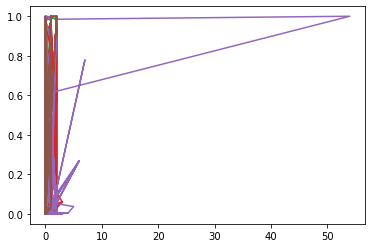

In [47]:
plt.plot(X,y_prob[:,1])

In [48]:
# CHecking accuracy for Logistic Regression model 
acc = accuracy_score(y_test, y_predict)
print('Accuracy =', acc)

Accuracy = 0.9993236714975845


In [49]:
print(model.coef_)

[[5.36397996 4.19975688 1.16422309 3.56979088 2.00433067 6.76475683]]


In [50]:
print(model.intercept_)

[-13.39321734]


In [51]:
model.predict_proba(X)

array([[9.99945835e-01, 5.41647284e-05],
       [9.99988680e-01, 1.13204697e-05],
       [9.99945835e-01, 5.41647284e-05],
       ...,
       [9.64264582e-01, 3.57354184e-02],
       [9.99988680e-01, 1.13204697e-05],
       [9.99988680e-01, 1.13204697e-05]])

In [52]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20528
           1       0.99      0.92      0.96       172

    accuracy                           1.00     20700
   macro avg       1.00      0.96      0.98     20700
weighted avg       1.00      1.00      1.00     20700



Text(0, 0.5, 'Target')

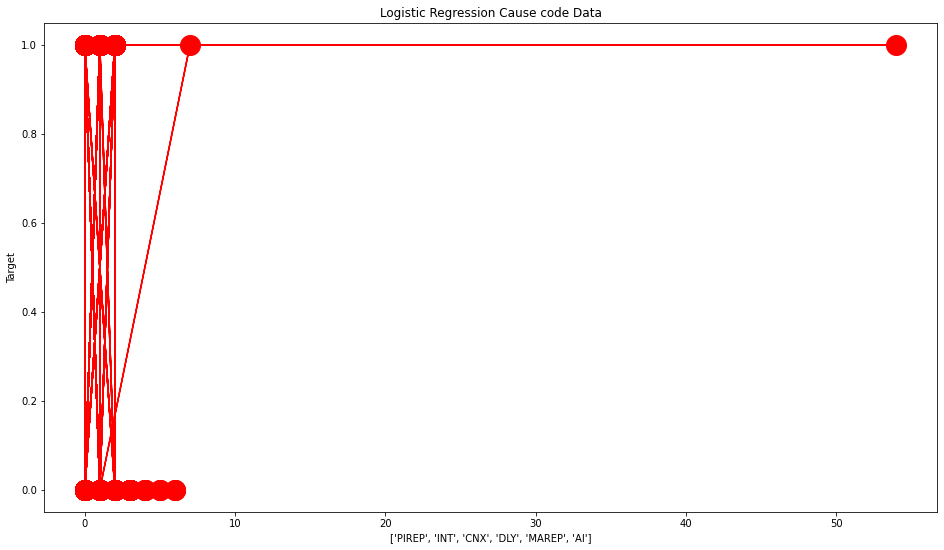

In [54]:
plt.figure(figsize=(16,9))
plt.plot(X,y, color = "r", marker = "o", markersize=20)
plt.title("Logistic Regression Cause code Data")
plt.xlabel("['PIREP', 'INT', 'CNX', 'DLY', 'MAREP', 'AI']")
plt.ylabel("Target")



In [55]:
#Plotting the pair plots

In [56]:
df_cleaned= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","TOT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [57]:
df_cleaned

,INT,CNX,DLY,PIREP,MAREPS,AI,OUTPUT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
62720,0,0,0,1,0,0,0
62721,0,0,0,0,1,0,0
62722,1,0,1,1,0,0,0
62723,0,0,0,0,1,0,0


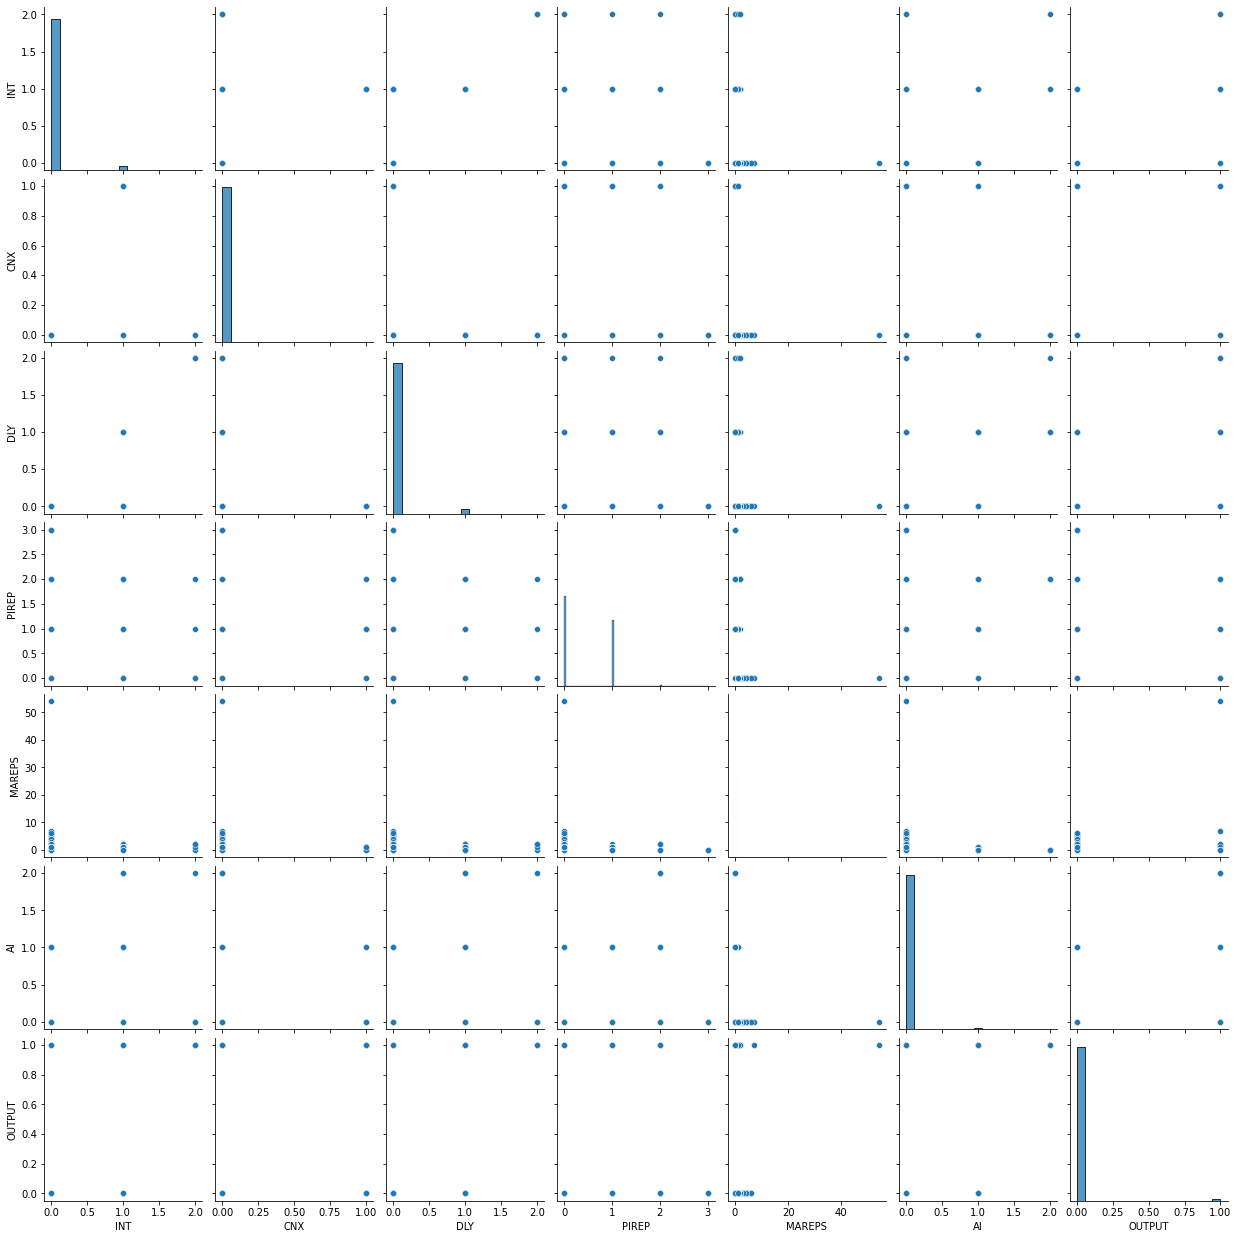

In [58]:
sns.pairplot(df_cleaned)

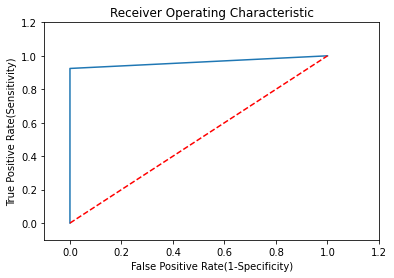

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

# LINEAR REGRESSION

In [60]:
df.head()

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0


In [61]:
df_reg= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","OUTPUT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [62]:
df_reg.head()

,INT,CNX,DLY,PIREP,MAREPS,AI,TOT
0,0,0,0,1,0,0,1.00
1,0,0,0,0,1,0,0.75
2,0,0,0,1,0,0,1.00
3,0,0,0,0,1,0,0.75
4,0,0,0,0,1,0,0.75


C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


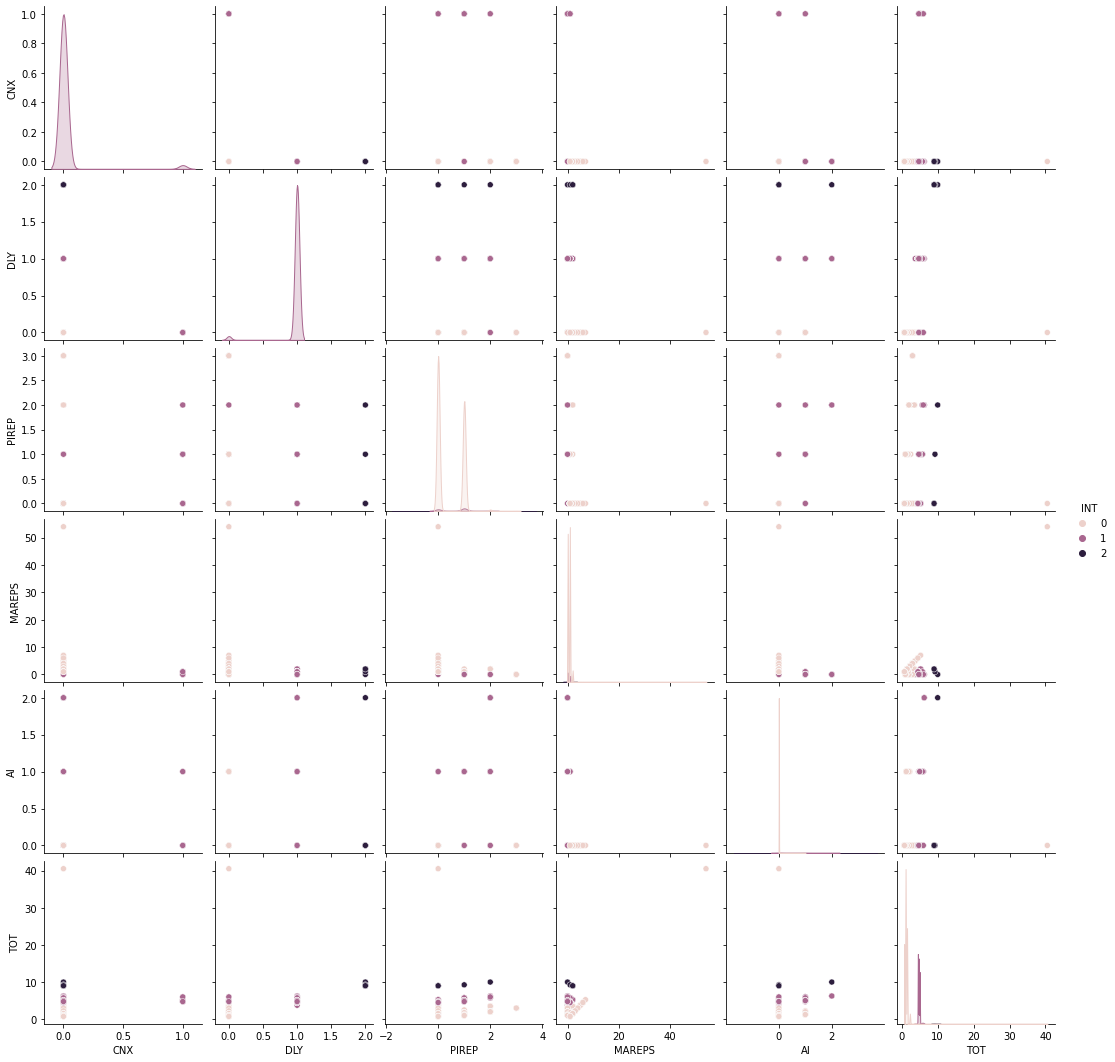

In [63]:
sns.pairplot(df_reg,hue="INT")

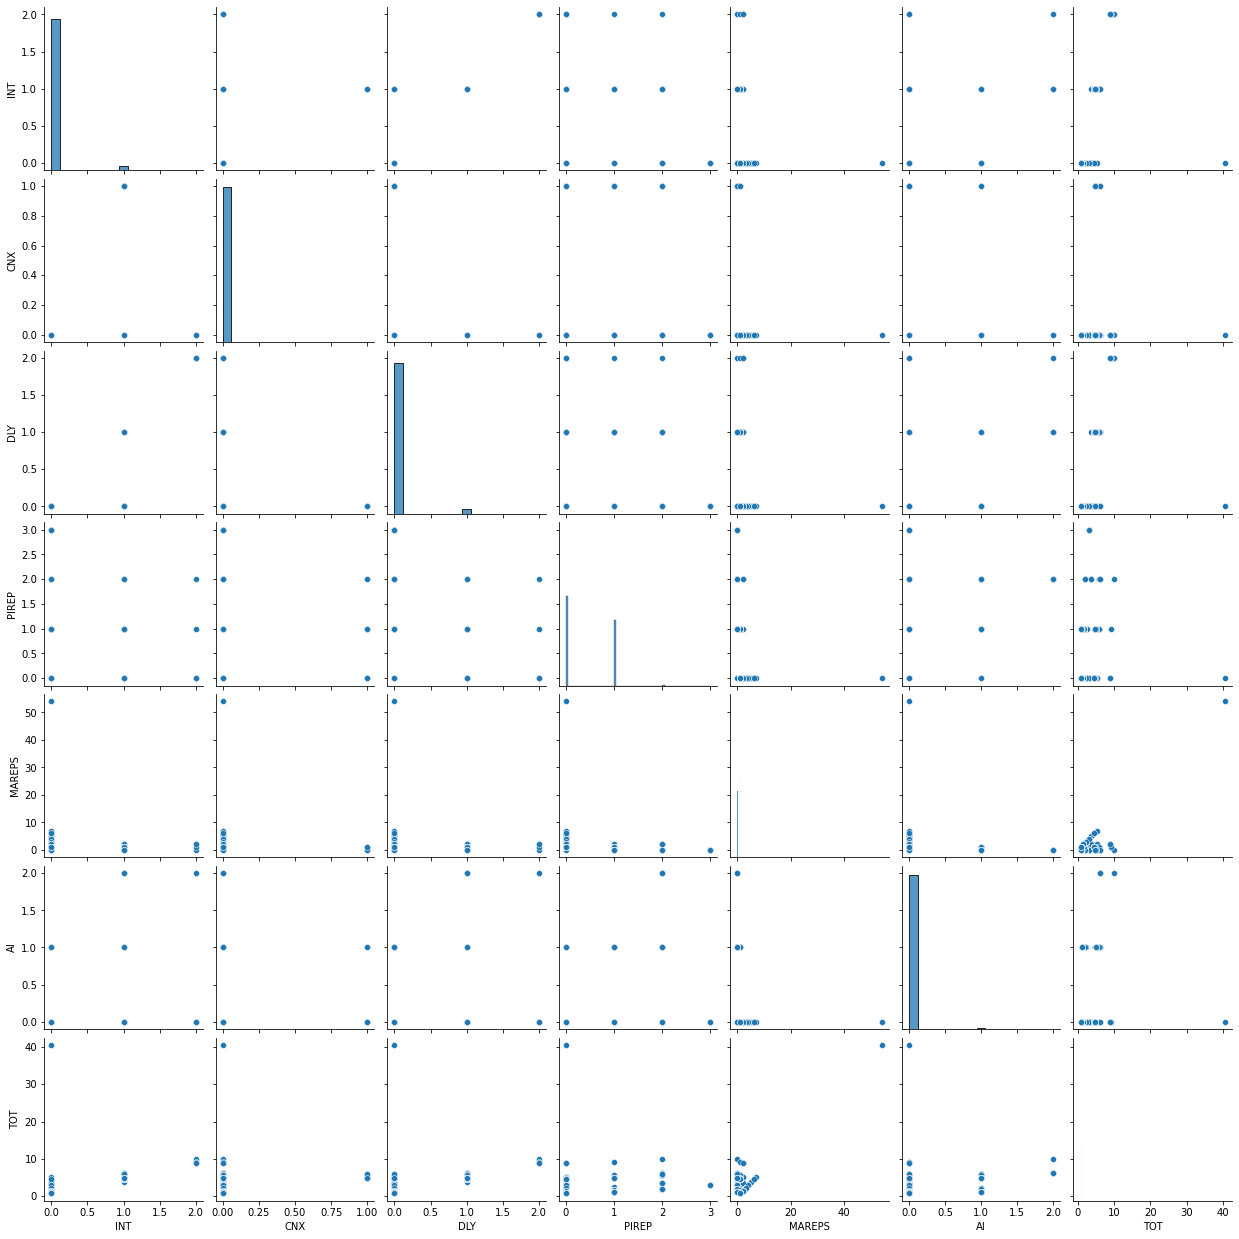

In [64]:
sns.pairplot(df_reg)

In [65]:
X=df_reg.iloc[:,:-1]
y=df_reg.iloc[:,-1]

In [66]:
X

,INT,CNX,DLY,PIREP,MAREPS,AI
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
62720,0,0,0,1,0,0
62721,0,0,0,0,1,0
62722,1,0,1,1,0,0
62723,0,0,0,0,1,0


In [67]:
y

0        1.00
1        0.75
2        1.00
3        0.75
4        0.75
         ... 
62720    1.00
62721    0.75
62722    4.75
62723    0.75
62724    0.75
Name: TOT, Length: 62725, dtype: float64

In [68]:
model= sm.OLS(y,X).fit()

<IPython.core.display.Javascript object>

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TOT   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.867e+31
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                        0.00
Time:                        07:03:34   Log-Likelihood:                      1.9131e+06
No. Observations:               62725   AIC:                                 -3.826e+06
Df Residuals:                   62720   BIC:                                 -3.826e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INT            2.5833   6.96e-16   3.71e+15      0.000       2.583       2.583
CNX            1.4167   1.37e-15   1.03e+15      0.000       1.417       1.417
DLY            1.1667   7.24e-16   1.61e+15      0.000       1.167       1.167
PIREP          1.0000    8.4e-17   1.19e+16      0.000       1.000       1.000
MAREPS         0.7500   6.71e-17   1.12e+16      0.000       0.750       0.750
AI             0.2500   6.49e-16   3.85e+14      0.000       0.250       0.250
==============================================================================
Omnibus:                    79184.199   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        133021856.314
Skew:                           6.086   Prob(JB):                         0.00
Kurtosis:                     228.275   Cond. No.                     3.88e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lin_regressor=LinearRegression()

In [73]:
mse=cross_val_score(lin_regressor,X,y,scoring="neg_mean_squared_error",cv=5)

In [74]:
mean_mse=np.mean(mse)
print(mean_mse)

-1.1066901656635106e-28


# Ridge Regression

In [75]:
from sklearn.linear_model import Ridge

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
ridge=Ridge()

In [78]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [79]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)

In [80]:
ridge_regressor.fit(X,y)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.06203e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [81]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-2.425395595513194e-28


In [82]:
#plotting Graph

# Lasso Regression

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-2.3353762839438253e-06


In [84]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

In [85]:
import seaborn as sns

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

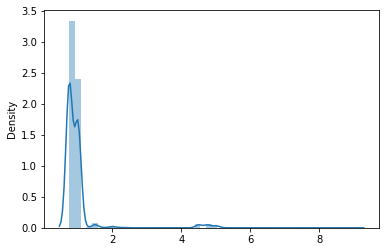

In [86]:
sns.distplot(prediction_lasso)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

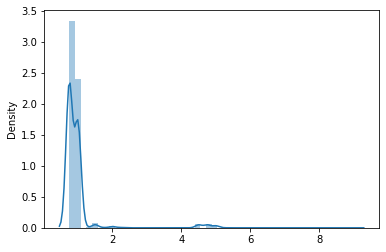

In [87]:
sns.distplot(prediction_ridge)

# SUPPORT VECTOR CLASSIFIER

In [88]:
df.head()

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0


In [89]:
df_svc= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","TOT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [90]:
df_svc

,INT,CNX,DLY,PIREP,MAREPS,AI,OUTPUT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
62720,0,0,0,1,0,0,0
62721,0,0,0,0,1,0,0
62722,1,0,1,1,0,0,0
62723,0,0,0,0,1,0,0


In [91]:
X=df_svc.iloc[:,0:6]
y=df_svc.iloc[:,6:7]
X

,INT,CNX,DLY,PIREP,MAREPS,AI
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
62720,0,0,0,1,0,0
62721,0,0,0,0,1,0
62722,1,0,1,1,0,0
62723,0,0,0,0,1,0


In [92]:
y

,OUTPUT
0,0
1,0
2,0
3,0
4,0
...,...
62720,0
62721,0
62722,0
62723,0


In [93]:
print("Shape of X=",X.shape)
print("Shape of y=",y.shape)

Shape of X= (62725, 6)
Shape of y= (62725, 1)


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=51)

In [95]:
print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (50180, 6)
Shape of X_test= (12545, 6)
Shape of y_train= (50180, 1)
Shape of y_test= (12545, 1)


In [96]:
from sklearn.svm import SVC

In [97]:
classification_rbf=SVC(kernel='rbf')

In [98]:
classification_rbf.fit(X_train,y_train)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [99]:
classification_rbf.score(X_test,y_test)

0.999920286966919

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc=StandardScaler()
sc.fit(X_train)


StandardScaler()

In [102]:
sc.fit

<bound method StandardScaler.fit of StandardScaler()>

In [103]:
X_train_sc=sc.transform(X_train)

In [104]:
X_test_sc=sc.transform(X_test)

In [105]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(X_train,y_train)
classification_rbf_2.score(X_test_sc,y_test)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9904344360302909

In [106]:
classification_rbf_2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
Y_classification_rbf=classification_rbf_2.predict(X_test)

In [108]:
Y_classification_rbf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
Y_classification_rbf_df=pd.DataFrame(Y_classification_rbf,columns=["Prediction on y(Radial basis function Classifier)"])

In [110]:
Y_classification_rbf_df

,Prediction on y(Radial basis function Classifier)
0,0
1,0
2,0
3,0
4,0
...,...
12540,0
12541,0
12542,0
12543,0


In [111]:
Y_classification_rbf_df.to_excel("classification_rbf_df.xlsx")

# SVC Polynomial Degree two or more

In [112]:
classification_poly2=SVC(kernel='poly',degree=2)
classification_poly2.fit(X_train,y_train)
classification_poly2.score(X_test_sc,y_test)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9987245914707055

In [113]:
classification_poly2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
Y_classification_poly2=classification_poly2.predict(X_test)

In [115]:
Y_classification_poly2_df=pd.DataFrame(Y_classification_poly2,columns=["Prediction on y(Polynomial Classifier-2 degree)"])

In [116]:
Y_classification_poly2_df

,Prediction on y(Polynomial Classifier-2 degree)
0,0
1,0
2,0
3,0
4,0
...,...
12540,0
12541,0
12542,0
12543,0


In [117]:
Y_classification_poly2_df.to_excel("classification_poly2_df.xlsx")

In [118]:
# Degree 3

In [119]:
classification_poly3=SVC(kernel='poly',degree=3)
classification_poly3.fit(X_train,y_train)
classification_poly3.score(X_test_sc,y_test)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9984057393383818

In [120]:
classification_poly3.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
Y_classification_poly3=classification_poly3.predict(X_test)

In [122]:
Y_classification_poly3_df=pd.DataFrame(Y_classification_poly3,columns=["Prediction on y(Polynomial Classifier-3 degree)"])

In [123]:
Y_classification_poly3_df

,Prediction on y(Polynomial Classifier-3 degree)
0,0
1,0
2,0
3,0
4,0
...,...
12540,0
12541,0
12542,0
12543,0


In [124]:
Y_classification_poly3_df=pd.DataFrame(Y_classification_poly3,columns=["Prediction on y(Polynomial Classifier-3 degree)"])

# SUPPORT VECTOR REGRESSOR

# DECISION TREE

In [125]:
df.head()

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0


In [126]:
df_decision_tree= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","TOT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [127]:
df_decision_tree.head()

,INT,CNX,DLY,PIREP,MAREPS,AI,OUTPUT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [128]:
X=df_svc.iloc[:,0:6]
y=df_svc.iloc[:,6:7]
X

,INT,CNX,DLY,PIREP,MAREPS,AI
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
62720,0,0,0,1,0,0
62721,0,0,0,0,1,0
62722,1,0,1,1,0,0
62723,0,0,0,0,1,0


In [129]:
y

,OUTPUT
0,0
1,0
2,0
3,0
4,0
...,...
62720,0
62721,0
62722,0
62723,0


In [130]:
X,y

(       INT  CNX  DLY  PIREP  MAREPS  AI
 0        0    0    0      1       0   0
 1        0    0    0      0       1   0
 2        0    0    0      1       0   0
 3        0    0    0      0       1   0
 4        0    0    0      0       1   0
 ...    ...  ...  ...    ...     ...  ..
 62720    0    0    0      1       0   0
 62721    0    0    0      0       1   0
 62722    1    0    1      1       0   0
 62723    0    0    0      0       1   0
 62724    0    0    0      0       1   0
 
 [62725 rows x 6 columns],
        OUTPUT
 0           0
 1           0
 2           0
 3           0
 4           0
 ...       ...
 62720       0
 62721       0
 62722       0
 62723       0
 62724       0
 
 [62725 rows x 1 columns])

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
treemodel=DecisionTreeClassifier()

In [136]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6333333333333333, 0.95, 'X[5] <= 0.5\ngini = 0.018\nsamples = 42025\nvalue = [41635, 390]'),
 Text(0.4666666666666667, 0.85, 'X[1] <= 0.5\ngini = 0.001\nsamples = 41616\nvalue = [41585, 31]'),
 Text(0.3333333333333333, 0.75, 'X[2] <= 1.5\ngini = 0.001\nsamples = 41588\nvalue = [41570, 18]'),
 Text(0.26666666666666666, 0.65, 'X[4] <= 6.5\ngini = 0.001\nsamples = 41585\nvalue = [41570, 15]'),
 Text(0.2, 0.55, 'X[2] <= 0.5\ngini = 0.001\nsamples = 41583\nvalue = [41570, 13]'),
 Text(0.13333333333333333, 0.45, 'gini = 0.0\nsamples = 40718\nvalue = [40718, 0]'),
 Text(0.26666666666666666, 0.45, 'X[3] <= 1.5\ngini = 0.03\nsamples = 865\nvalue = [852, 13]'),
 Text(0.2, 0.35, 'X[4] <= 1.5\ngini = 0.018\nsamples = 860\nvalue = [852, 8]'),
 Text(0.13333333333333333, 0.25, 'X[3] <= 0.5\ngini = 0.009\nsamples = 856\nvalue = [852, 4]'),
 Text(0.06666666666666667, 0.15, 'gini = 0.0\nsamples = 459\nvalue = [459, 0]'),
 Text(0.2, 0.15, 'X[4] <= 0.5\ngini = 0.02\nsamples = 397\nvalue = [393, 4]

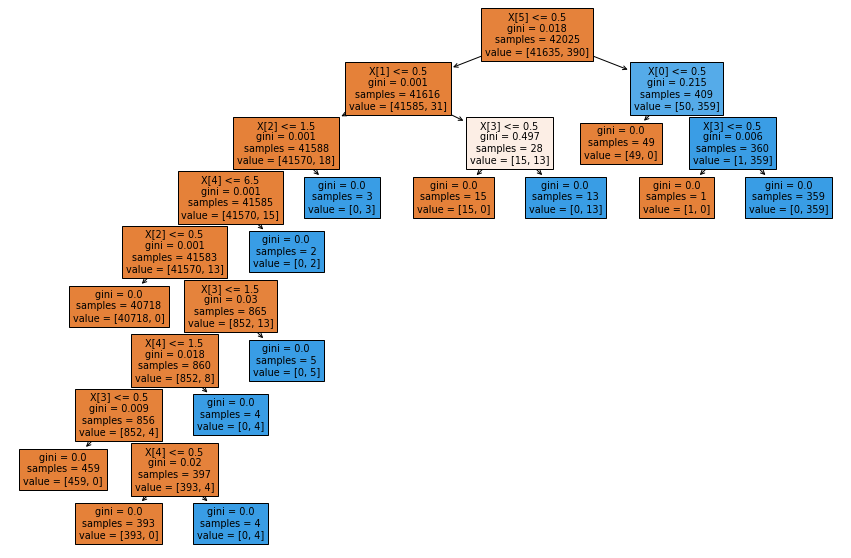

In [137]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [138]:
y_pred_dt=treemodel.predict(X_test)

In [139]:
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score,classification_report

In [141]:
score=accuracy_score(y_pred_dt,y_test)

In [142]:
print(score)

1.0


# BAGGING

In [143]:
from sklearn.ensemble import BaggingClassifier

In [144]:
estimator_range = [2,4,6,8,10,12,14,16]

In [145]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

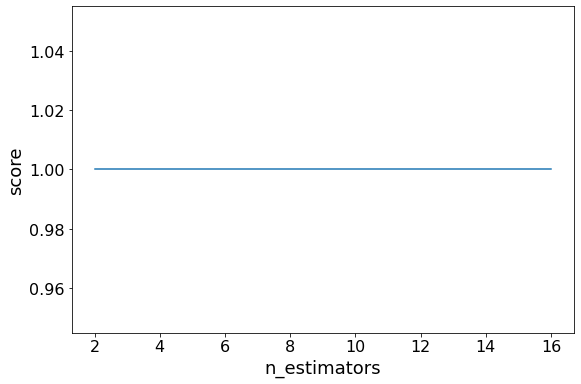

In [146]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [147]:
oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)


C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9998810232004759


C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [148]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree


C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[Text(0.6333333333333333, 0.9444444444444444, 'AI <= 0.5\ngini = 0.018\nsamples = 26645\nvalue = [41646, 379]'),
 Text(0.4666666666666667, 0.8333333333333334, 'CNX <= 0.5\ngini = 0.001\nsamples = 26392\nvalue = [41595, 31]'),
 Text(0.3333333333333333, 0.7222222222222222, 'MAREPS <= 6.5\ngini = 0.001\nsamples = 26371\nvalue = [41578, 15]'),
 Text(0.26666666666666666, 0.6111111111111112, 'PIREP <= 1.5\ngini = 0.001\nsamples = 26369\nvalue = [41578, 12]'),
 Text(0.13333333333333333, 0.5, 'DLY <= 0.5\ngini = 0.0\nsamples = 26237\nvalue = [41375, 5]'),
 Text(0.06666666666666667, 0.3888888888888889, 'gini = 0.0\nsamples = 25712\nvalue = [40543, 0]'),
 Text(0.2, 0.3888888888888889, 'MAREPS <= 1.5\ngini = 0.012\nsamples = 525\nvalue = [832, 5]'),
 Text(0.13333333333333333, 0.2777777777777778, 'PIREP <= 0.5\ngini = 0.005\nsamples = 522\nvalue = [832, 2]'),
 Text(0.06666666666666667, 0.16666666666666666, 'gini = 0.0\nsamples = 279\nvalue = [442, 0]'),
 Text(0.2, 0.16666666666666666, 'MAREPS <= 0

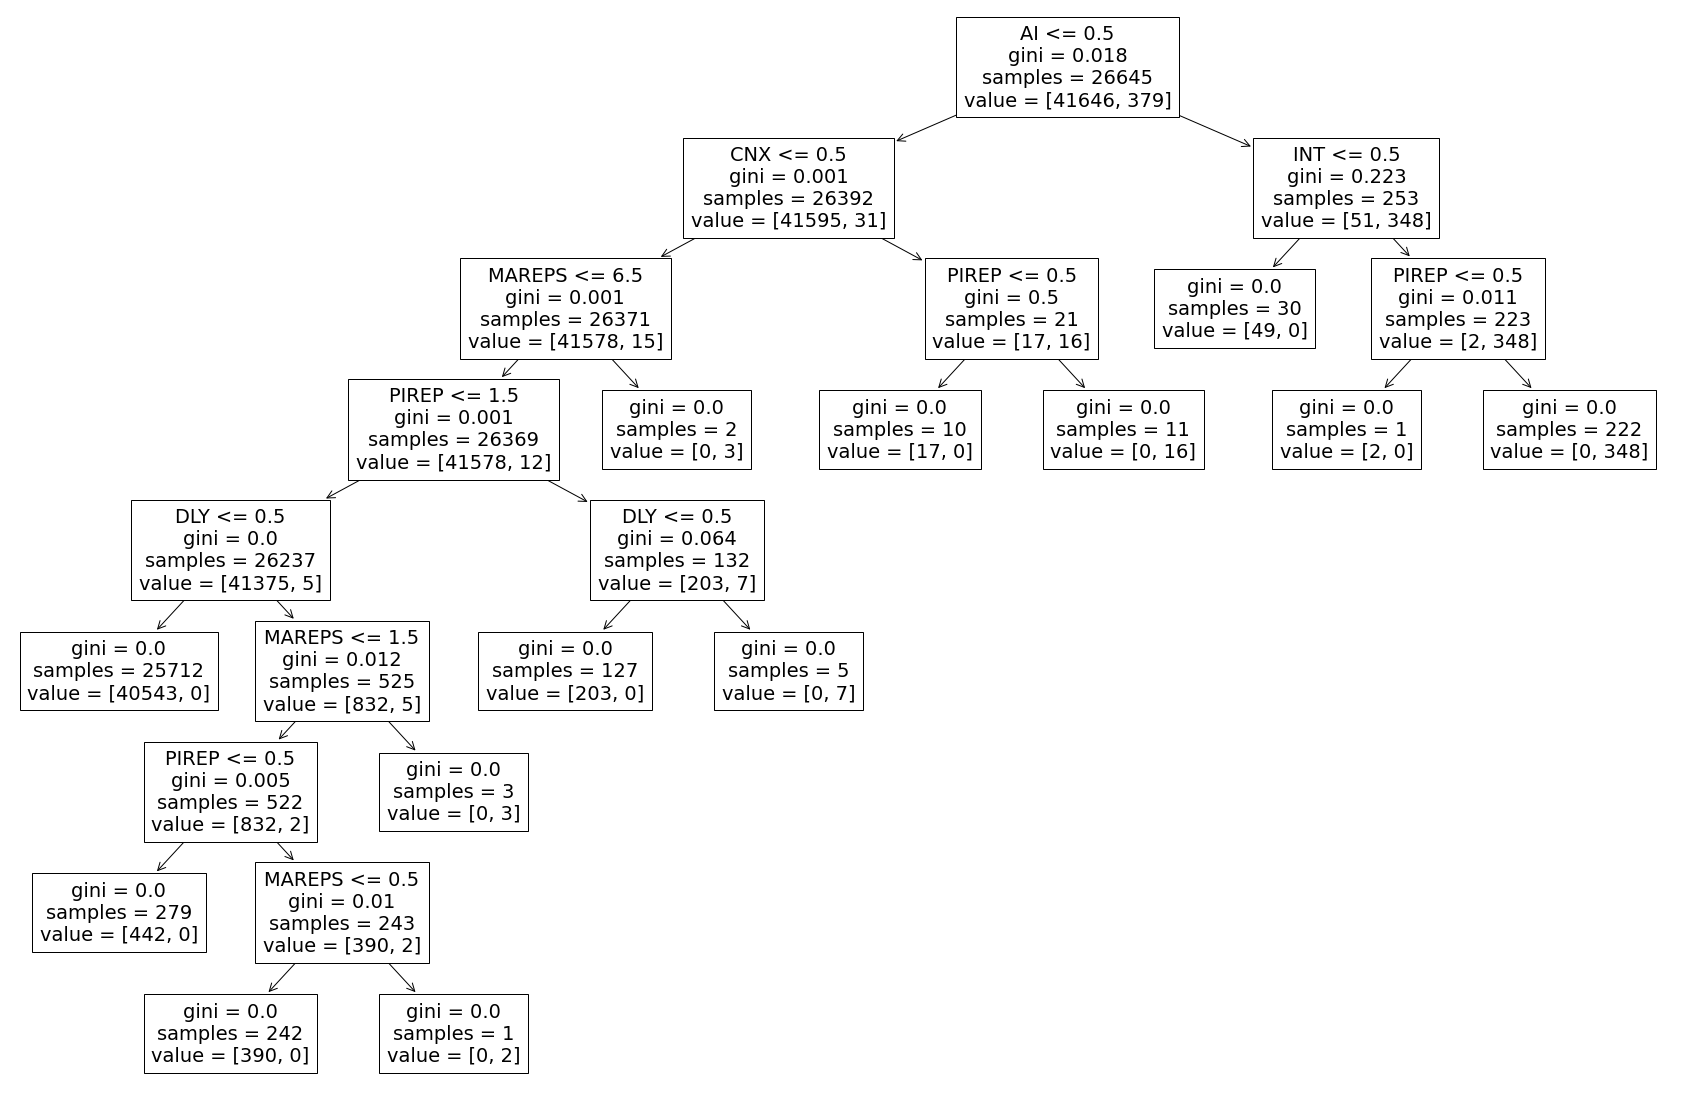

In [149]:
clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

# Hierarchical clustering Pirep,mirep & others

In [150]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Neural Network

In [151]:
df.head()

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0


In [152]:
df_neural= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","TOT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [153]:
df_neural

,INT,CNX,DLY,PIREP,MAREPS,AI,OUTPUT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
62720,0,0,0,1,0,0,0
62721,0,0,0,0,1,0,0
62722,1,0,1,1,0,0,0
62723,0,0,0,0,1,0,0


In [154]:
X=df_neural.iloc[:,0:6]
y=df_neural.iloc[:,6:7]
X

,INT,CNX,DLY,PIREP,MAREPS,AI
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
62720,0,0,0,1,0,0
62721,0,0,0,0,1,0
62722,1,0,1,1,0,0
62723,0,0,0,0,1,0


In [155]:
from sklearn.neural_network import MLPClassifier

In [156]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=51)

In [158]:
print("Shape of X_train=",X_train.shape)
print("Shape of X_test=",X_test.shape)
print("Shape of y_train=",y_train.shape)
print("Shape of y_test=",y_test.shape)

Shape of X_train= (50180, 6)
Shape of X_test= (12545, 6)
Shape of y_train= (50180, 1)
Shape of y_test= (12545, 1)


In [159]:
clf.fit(X_train, y_train)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [160]:
clf.score(X_test,y_test)

1.0

In [161]:
df.head()

,ID,CHAPTER,SUB_SYSTEM,LOG_PAGE,STATION,INDICATION,SOURCE_CAT,DRIVER_ISSUE,ACTION,REPORT_DATE,RNK,INT,CNX,DLY,PIREP,MAREPS,AI,TOT,PREDICTION,OUTPUT
0,2373,21,2131,1460829,RIV,AUTO FAIL,CABIN PRESSURE CONTROL SYS,ILLUMINATE,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
1,683,21,2165,1244285,SKF,AUTO FAIL,CABIN PRESSURE CONTROL SYS,MESSAGE,OPS CHECK GOOD,202106,0.28794,0,0,0,0,1,0,0.75,low,0
2,832,21,2131,1460837,PDX,AUTO FAIL,CABIN PRESSURE CONTROLLER,FAIL,RAR,202109,0.69444,0,0,0,1,0,0,1.00,low,0
3,925,21,2131,1460831,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,OPS CHECK GOOD,202109,0.28794,0,0,0,0,1,0,0.75,low,0
4,2636,21,2100,1421664,IAH,AUTO FAIL,CABIN PRESSURE CONTROLLER,ILLUMINATE,RAR,202109,0.28794,0,0,0,0,1,0,0.75,low,0


In [162]:
df_knn= df.drop(["ID","CHAPTER", "SUB_SYSTEM","LOG_PAGE","STATION","INDICATION","SOURCE_CAT","TOT","DRIVER_ISSUE","ACTION","REPORT_DATE","RNK","PREDICTION"], axis=1)

In [163]:
df_knn

,INT,CNX,DLY,PIREP,MAREPS,AI,OUTPUT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
62720,0,0,0,1,0,0,0
62721,0,0,0,0,1,0,0
62722,1,0,1,1,0,0,0
62723,0,0,0,0,1,0,0


In [164]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler=StandardScaler()

In [167]:
scaler.fit(df_knn.drop("OUTPUT",axis=1))

StandardScaler()

In [168]:
scaled_features=scaler.transform(df_knn.drop("OUTPUT",axis=1))

In [169]:
df_feat=pd.DataFrame(scaled_features,columns=df_knn.columns[:-1])
df_feat.head()

,INT,CNX,DLY,PIREP,MAREPS,AI
0,-0.176168,-0.026794,-0.173991,1.125531,-1.042289,-0.096784
1,-0.176168,-0.026794,-0.173991,-0.850314,0.714512,-0.096784
2,-0.176168,-0.026794,-0.173991,1.125531,-1.042289,-0.096784
3,-0.176168,-0.026794,-0.173991,-0.850314,0.714512,-0.096784
4,-0.176168,-0.026794,-0.173991,-0.850314,0.714512,-0.096784


Pair-Plot

In [170]:
import seaborn as sns

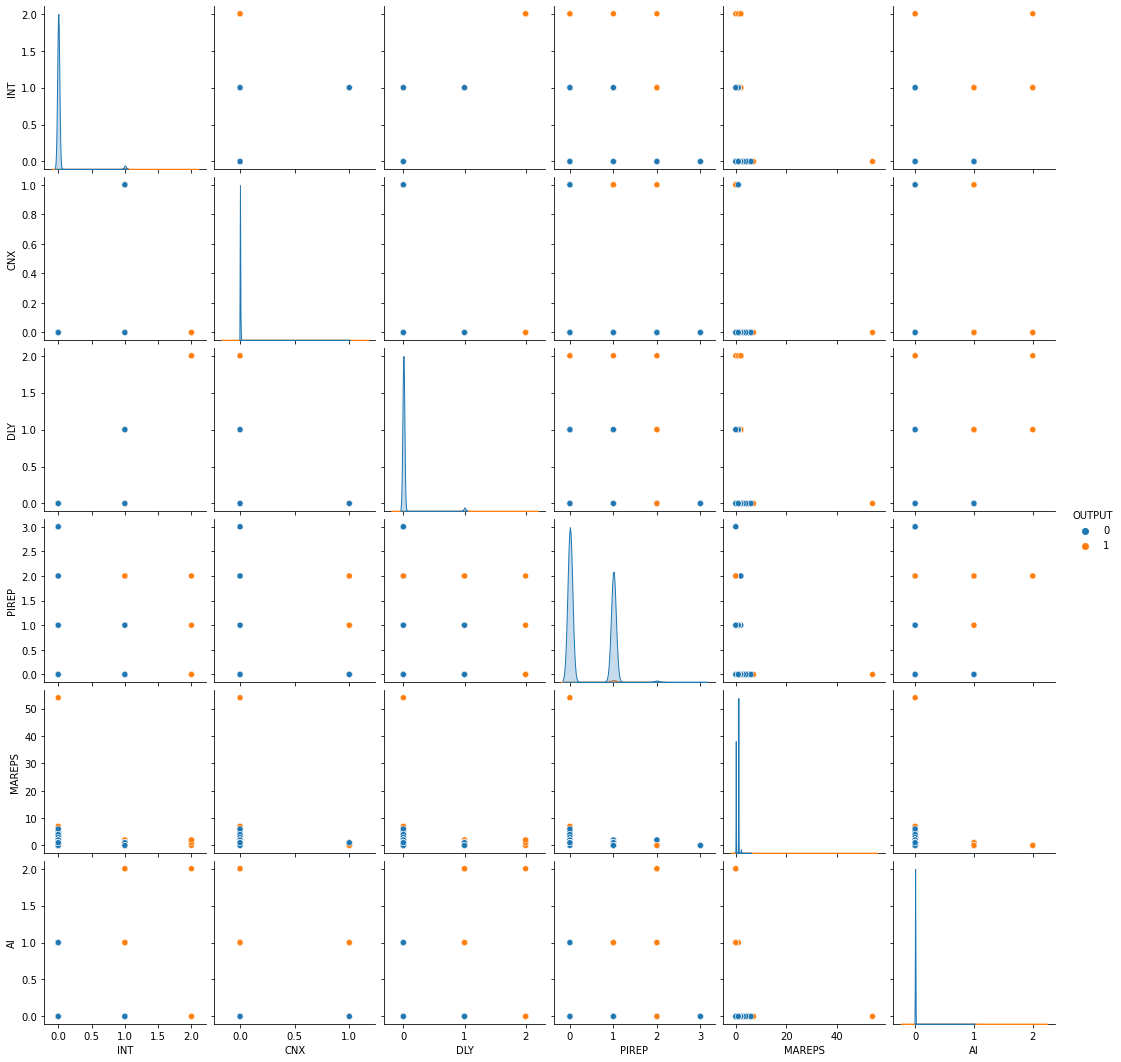

In [171]:
sns.pairplot(df_knn,hue="OUTPUT")

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=51)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn=KNeighborsClassifier(n_neighbors=1)

In [175]:
knn.fit(X_train,y_train)

C:\Users\rcmlp.12\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [176]:
y_predict=knn.predict(X_test)

# Predictions and Evaluation

In [177]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support

In [178]:
confusion_matrix(y_test, y_predict)

array([[12425,     0],
       [    1,   119]], dtype=int64)

In [179]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12425
           1       1.00      0.99      1.00       120

    accuracy                           1.00     12545
   macro avg       1.00      1.00      1.00     12545
weighted avg       1.00      1.00      1.00     12545



# Choosing a K Value